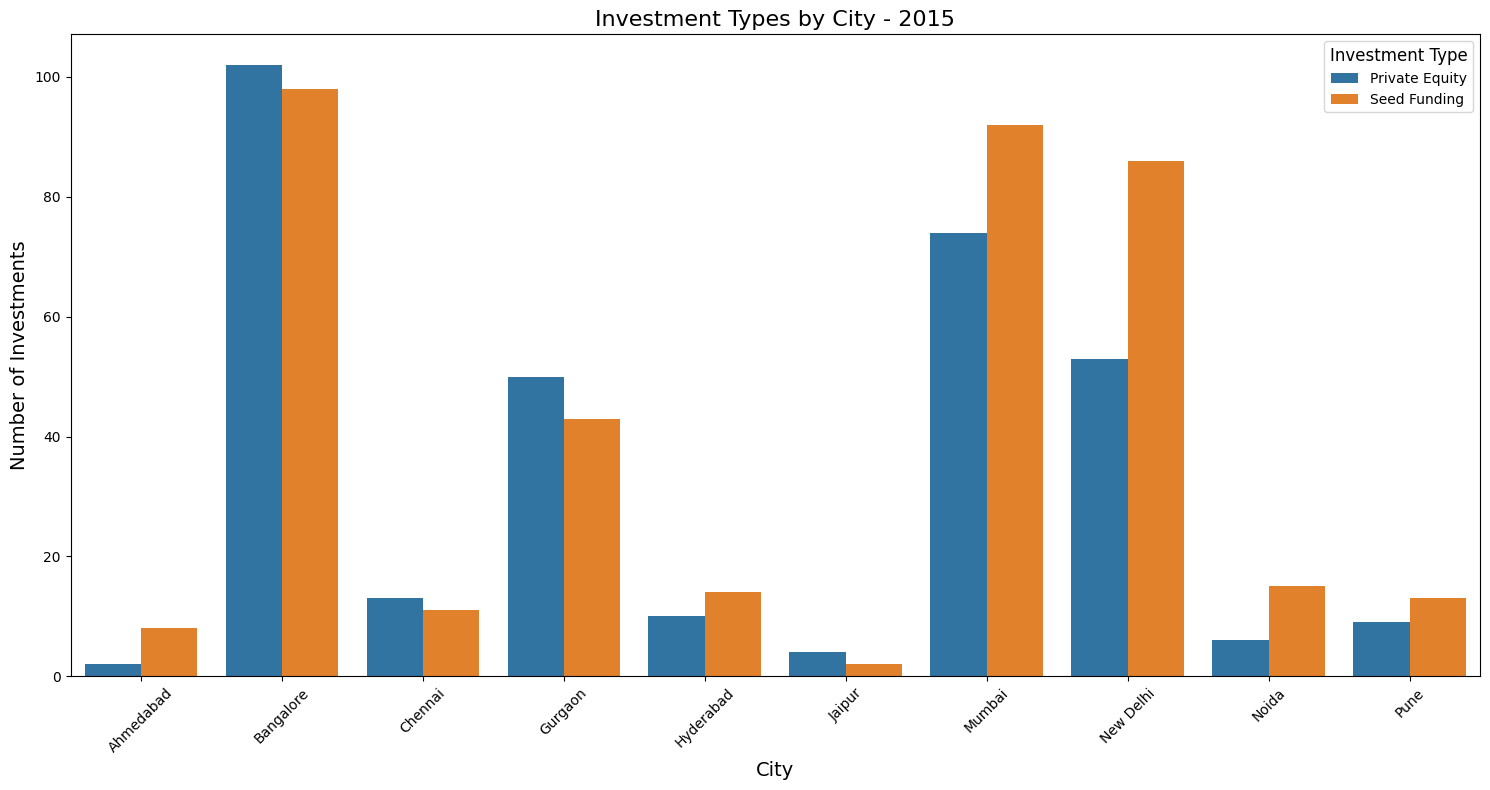

In [2]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os


folder_path = '/kaggle/input/startups-funding-dataset/StartUp_FundingScrappingData/2015'
all_files = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if f.endswith('.csv')]


df_list = [pd.read_csv(file) for file in all_files]
df_2015 = pd.concat(df_list, ignore_index=True)


df_2015_clean = df_2015.dropna(subset=['City / Location', 'InvestmentType'])


grouped = df_2015_clean.groupby(['City / Location', 'InvestmentType']).size().reset_index(name='Count')


top_cities = grouped.groupby('City / Location')['Count'].sum().sort_values(ascending=False).head(10).index
grouped_top = grouped[grouped['City / Location'].isin(top_cities)]


plt.figure(figsize=(15,8))
sns.barplot(data=grouped_top, x='City / Location', y='Count', hue='InvestmentType')

plt.title('Investment Types by City - 2015', fontsize=16)
plt.xlabel('City', fontsize=14)
plt.ylabel('Number of Investments', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Investment Type', title_fontsize=12, fontsize=10)
plt.tight_layout()
plt.show()


### Analysis of Investment Types by City - 2015

The bar chart above illustrates the distribution of startup investments in India's top 10 cities during 2015, categorized by investment type (Private Equity and Seed Funding).

Key observations:
- **Bangalore** dominates the startup investment landscape, receiving the highest number of both Private Equity and Seed Funding rounds.  
- **Mumbai** and **New Delhi** follow Bangalore closely, with a slight preference for Seed Funding over Private Equity.
- **Gurgaon** shows a balanced mix between the two investment types, though Private Equity investments are slightly higher.
- Cities like **Hyderabad**, **Noida**, and **Pune** have a larger share of Seed Funding compared to Private Equity, indicating their role in supporting earlier-stage startups.
- **Ahmedabad** and **Jaipur** received relatively fewer investments overall, reflecting a more nascent startup ecosystem.

Overall, the data highlights the strong concentration of startup funding activities in Bangalore, Mumbai, and New Delhi, reinforcing their positions as India's leading innovation hubs.


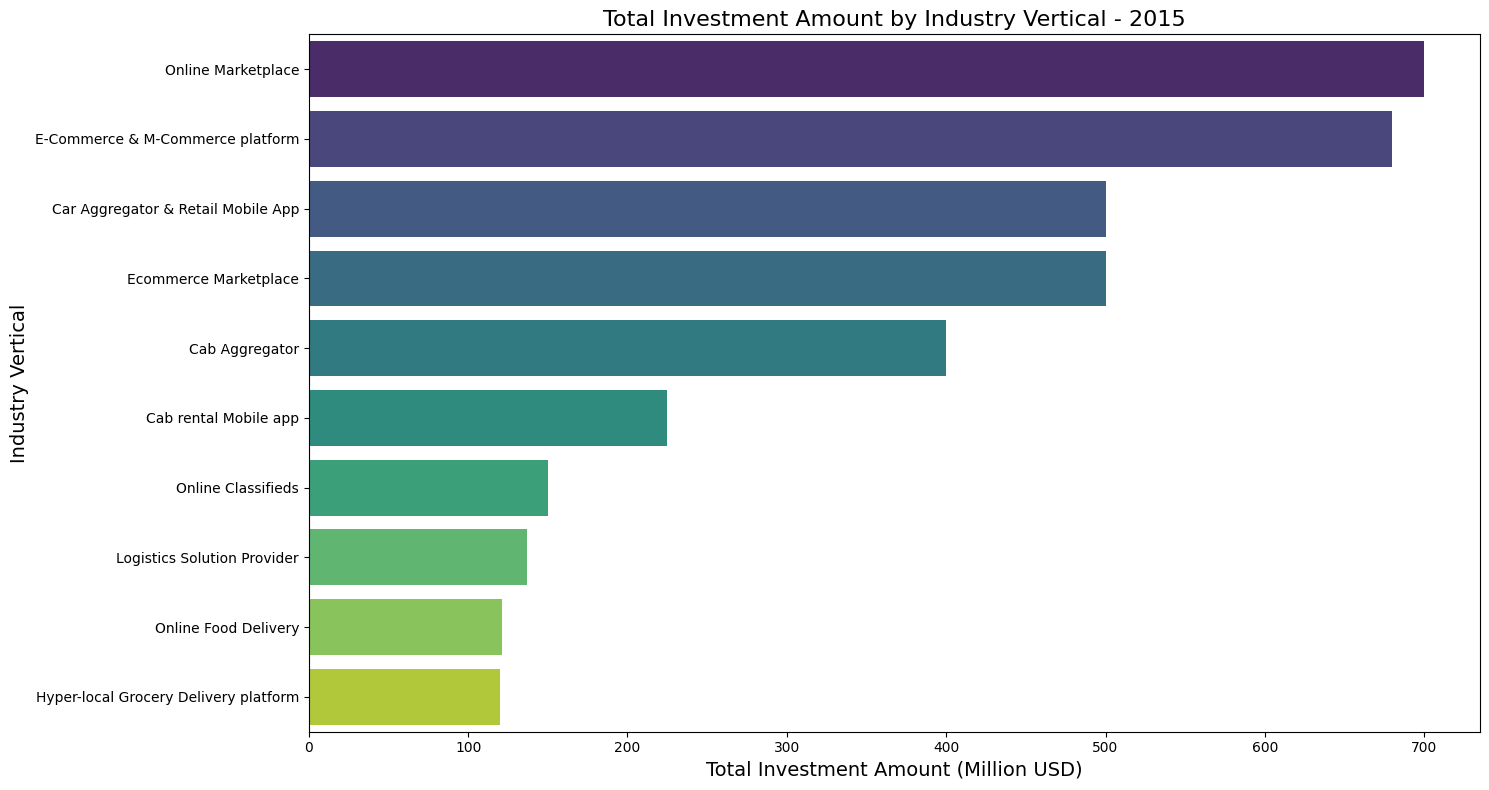

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os


folder_path = '/kaggle/input/startups-funding-dataset/StartUp_FundingScrappingData/2015'
all_files = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if f.endswith('.csv')]

df_list = [pd.read_csv(file) for file in all_files]
df_2015 = pd.concat(df_list, ignore_index=True)


df_2015_amount = df_2015.dropna(subset=['Amount (in USD)', 'Industry Vertical'])


df_2015_amount.loc[:, 'Amount (in USD)'] = (
    df_2015_amount['Amount (in USD)']
    .replace({',': ''}, regex=True)
    .astype(float)
)


sector_investments = (
    df_2015_amount
    .groupby('Industry Vertical')['Amount (in USD)']
    .sum()
    .reset_index()
)


sector_investments = sector_investments.sort_values(by='Amount (in USD)', ascending=False)


sector_investments['Amount (in Million USD)'] = sector_investments['Amount (in USD)'] / 1_000_000


top_sectors = sector_investments.head(10)


plt.figure(figsize=(15,8))
sns.barplot(
    data=top_sectors, 
    x='Amount (in Million USD)', 
    y='Industry Vertical', 
    palette='viridis'
)

plt.title('Total Investment Amount by Industry Vertical - 2015', fontsize=16)
plt.xlabel('Total Investment Amount (Million USD)', fontsize=14)
plt.ylabel('Industry Vertical', fontsize=14)
plt.tight_layout()
plt.show()


### Analysis of Total Investment Amount by Industry Vertical - 2015

The bar chart above illustrates the top 10 industry verticals that attracted the highest total investment amounts in 2015, measured in million USD.

Key insights:
- **Online Marketplace** and **E-Commerce & M-Commerce platforms** overwhelmingly dominated startup investments, each securing over $700 million in funding. This trend reflects the rapid digitalization of consumer behavior and the increasing shift toward online retail platforms during that period.
- **Car Aggregator & Retail Mobile Apps** and **Ecommerce Marketplaces** also received significant funding, each approaching $500 million, indicating strong investor confidence in transportation and alternative commerce solutions.
- **Cab Aggregators** and **Cab Rental Mobile Apps** secured considerable investment as well, benefiting from the growth of shared economy models and urban mobility demands.
- **Online Classifieds** and **Logistics Solution Providers** demonstrated the importance of service-based marketplaces and supply chain optimization in India's startup ecosystem.
- Interestingly, sectors like **Online Food Delivery** and **Hyper-local Grocery Delivery Platforms** attracted relatively lower investments compared to marketplaces and mobility solutions, suggesting these markets were still emerging in 2015.

Overall, the data highlights that investors in 2015 heavily favored scalable, platform-based business models capable of capturing large consumer bases across India.


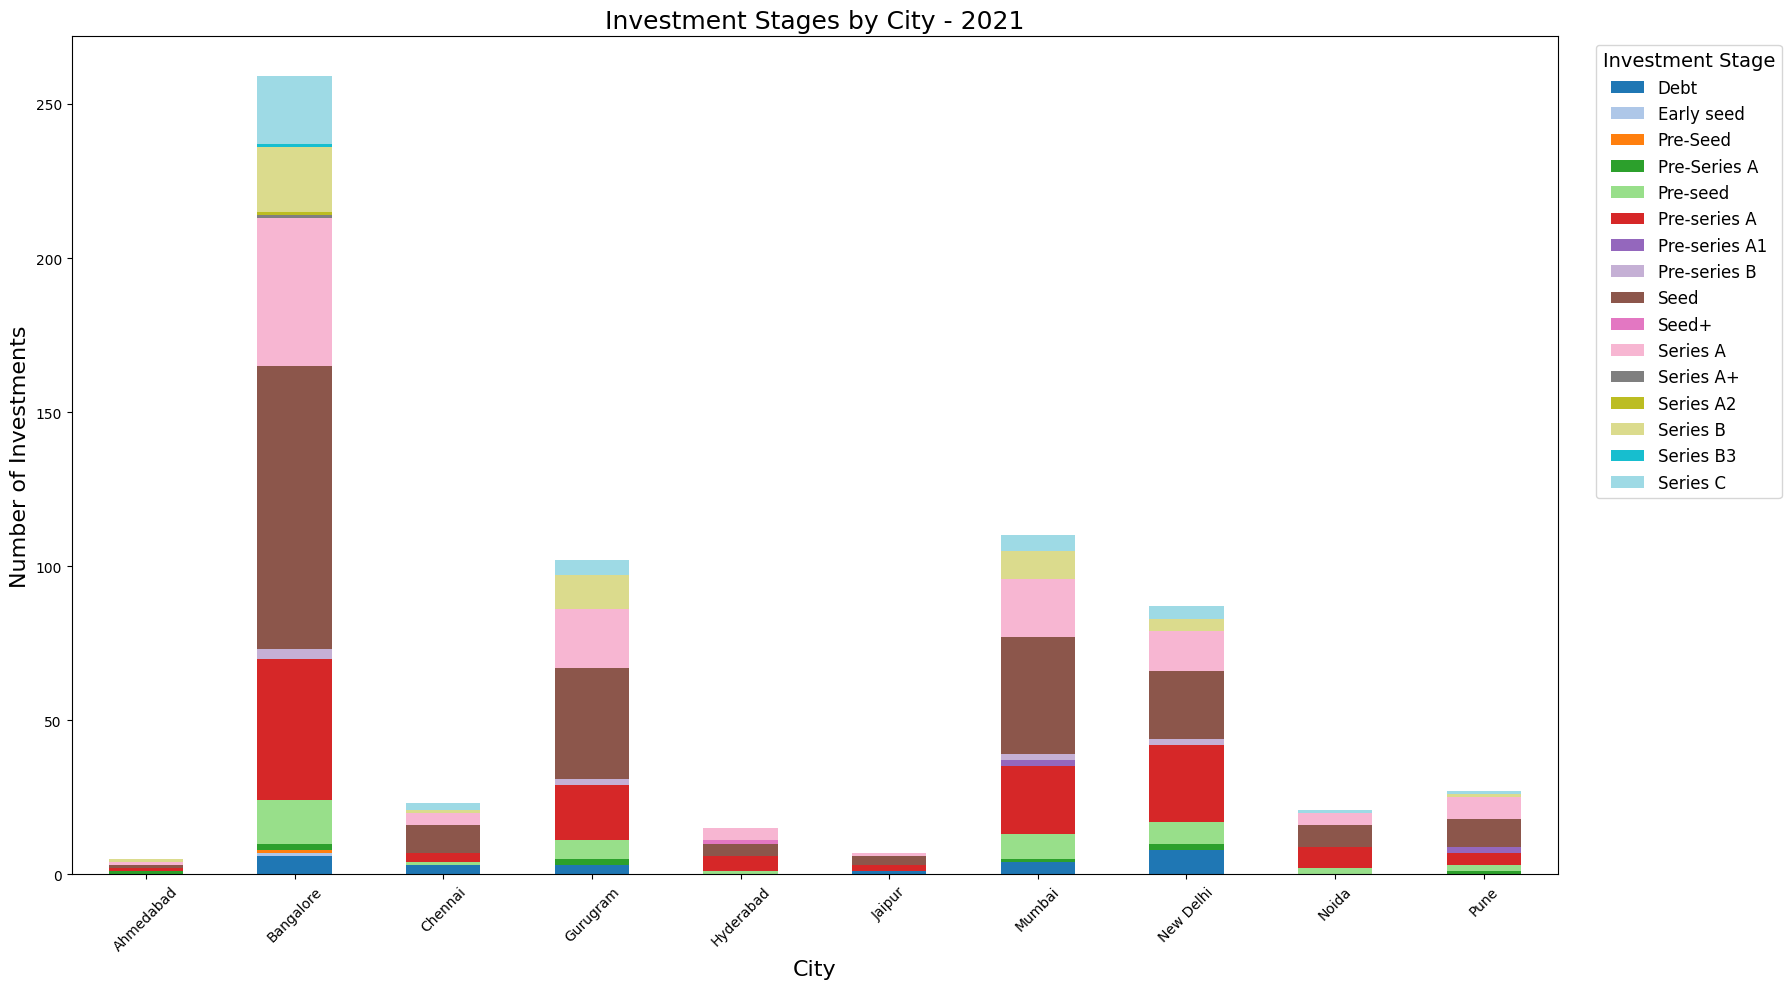

In [ ]:

folder_path_2021 = '/kaggle/input/startups-funding-dataset/StartUp_FundingScrappingData/2021'
all_files_2021 = [os.path.join(folder_path_2021, f) for f in os.listdir(folder_path_2021) if f.endswith('.csv')]

df_list_2021 = [pd.read_csv(file) for file in all_files_2021]
df_2021 = pd.concat(df_list_2021, ignore_index=True)


df_2021_clean = df_2021.dropna(subset=['City', 'Investment Stage'])


valid_stages = [
    'Seed', 'Pre-Seed', 'Angel', 'Series A', 'Series B', 'Series C', 'Private Equity', 'Debt'
]


df_2021_clean.loc[:, 'Investment Stage'] = df_2021_clean['Investment Stage'].astype(str)
df_2021_clean_filtered = df_2021_clean[
    df_2021_clean['Investment Stage'].str.contains('|'.join(valid_stages), case=False, na=False)
]


grouped_2021 = (
    df_2021_clean_filtered
    .groupby(['City', 'Investment Stage'])
    .size()
    .reset_index(name='Count')
)


top_cities_2021 = (
    grouped_2021
    .groupby('City')['Count']
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .index
)

grouped_top_2021 = grouped_2021[grouped_2021['City'].isin(top_cities_2021)]


pivot_2021 = grouped_top_2021.pivot(index='City', columns='Investment Stage', values='Count').fillna(0)


pivot_2021.plot(
    kind='bar',
    stacked=True,
    figsize=(18,10),
    colormap='tab20'
)

plt.title('Investment Stages by City - 2021', fontsize=18)
plt.xlabel('City', fontsize=16)
plt.ylabel('Number of Investments', fontsize=16)
plt.xticks(rotation=45)


plt.legend(
    title='Investment Stage', 
    title_fontsize=14, 
    fontsize=12,
    bbox_to_anchor=(1.02, 1),
    loc='upper left'
)

plt.tight_layout()
plt.show()


### Analysis of Investment Stages by City - 2021

The stacked bar chart above illustrates the distribution of startup investments across India's top 10 cities in 2021, categorized by investment stage.

Key insights:
- **Bangalore** stands out as the undisputed leader in startup investments, with a substantial number of investments concentrated across multiple stages. Notably, Bangalore dominated in Seed, Pre-Series A, and Series A rounds.
- **Mumbai** and **Gurugram** (also referred to as Gurgaon) follow Bangalore, showing a healthy mix of early-stage (Seed, Pre-Seed) and growth-stage (Series A, B) funding activities.
- **New Delhi** also demonstrates significant investment activity, particularly in Seed and Pre-Series A stages, highlighting its role as a strong early-stage ecosystem.
- **Chennai**, **Hyderabad**, and **Pune** exhibit more limited investment distributions but maintain active early-stage fundraising, mainly through Seed and Pre-Series rounds.
- **Ahmedabad**, **Noida**, and **Jaipur** show lower overall investment volumes, reflecting relatively smaller startup ecosystems compared to the leading hubs.

### Observations on Investment Stages:
- **Seed and Pre-Series A rounds** dominate the investment landscape, emphasizing continued investor interest in early-stage startups.
- **Series A and B rounds** also feature prominently in leading cities, indicating the growing maturity of the Indian startup ecosystem.
- **Debt financing** and **later-stage investments (Series C and beyond)** are comparatively rare, suggesting that most startups are still within early to growth phases.

---

**Note:**  
In comparison to 2015, where funding types were primarily categorized under broad labels like *Seed Funding* and *Private Equity*, the 2021 data reflects a much more granular classification of investment stages. This evolution mirrors the maturity and expansion of the Indian startup ecosystem over the six-year period. To maintain meaningful comparisons, the 2021 data was carefully filtered to exclude ambiguous or irrelevant entries, focusing only on significant and commonly recognized funding stages.


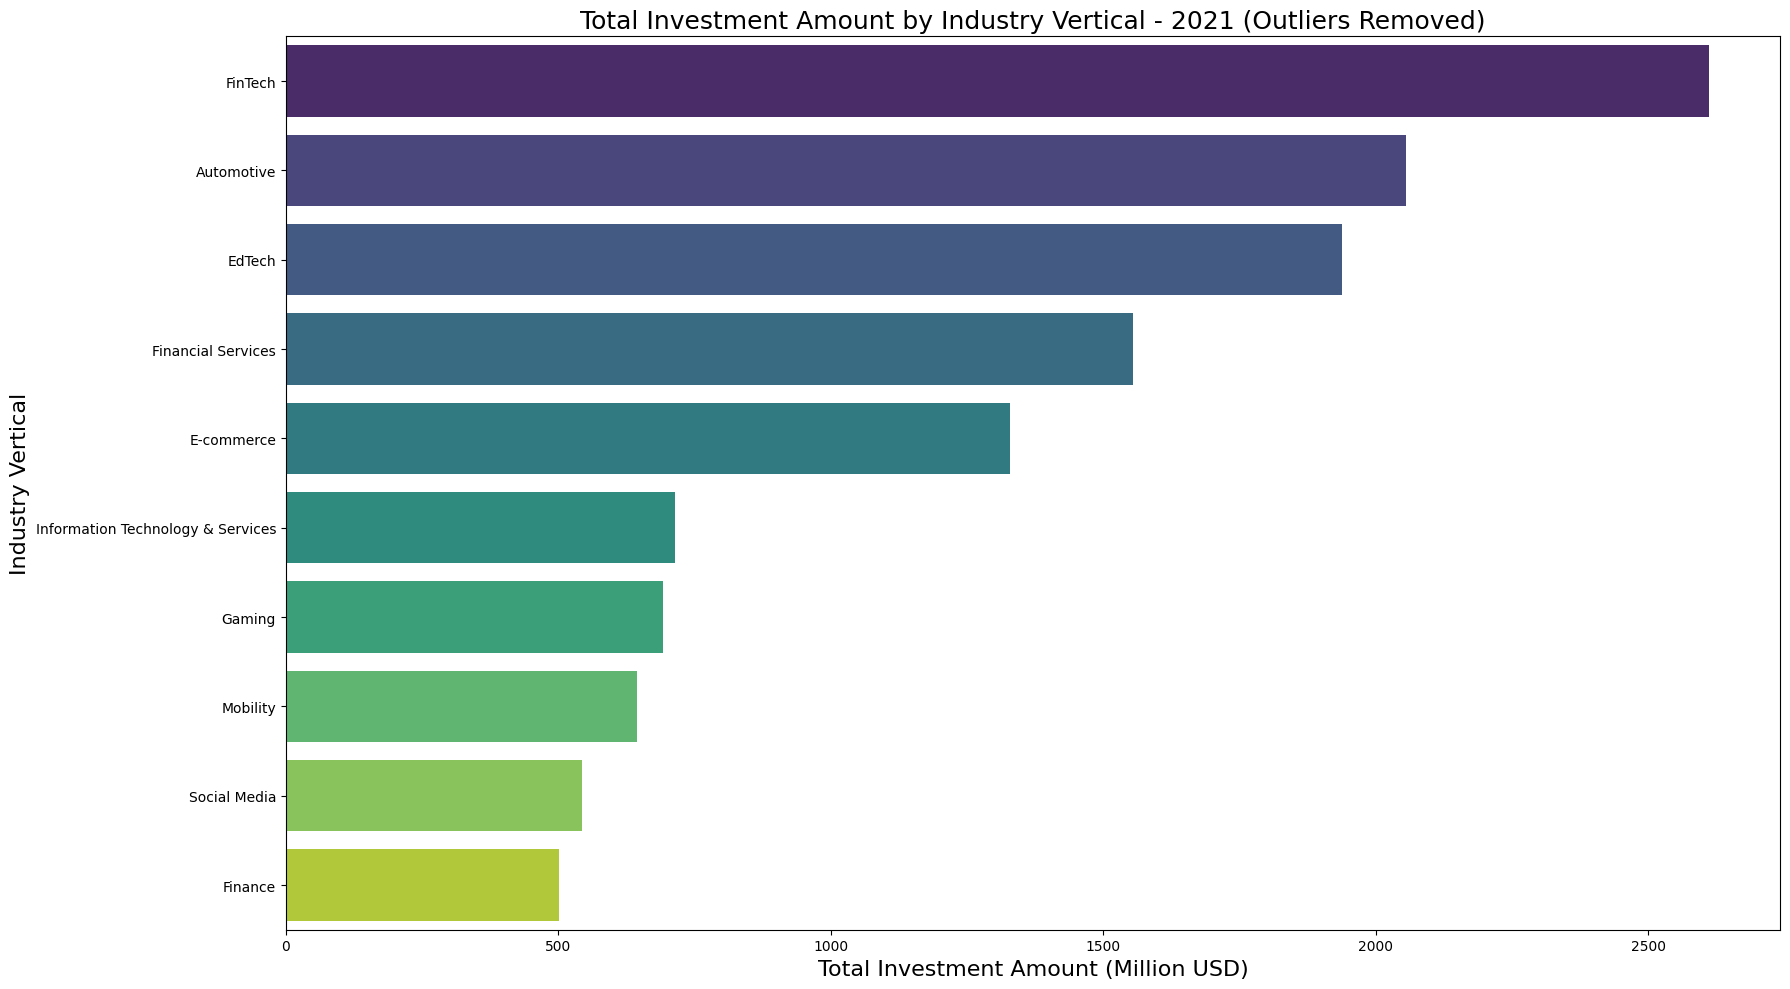

In [ ]:

df_2021_clean_amount_filtered = df_2021_clean_amount[
    df_2021_clean_amount['Amount(in USD)'] <= 500_000_000
]


sector_investments_2021 = (
    df_2021_clean_amount_filtered
    .groupby('Industry/Vertical')['Amount(in USD)']
    .sum()
    .reset_index()
)


sector_investments_2021 = sector_investments_2021.sort_values(by='Amount(in USD)', ascending=False)


sector_investments_2021['Amount (in Million USD)'] = sector_investments_2021['Amount(in USD)'] / 1_000_000


top_sectors_2021 = sector_investments_2021.head(10)


plt.figure(figsize=(18,10))
sns.barplot(
    data=top_sectors_2021, 
    x='Amount (in Million USD)', 
    y='Industry/Vertical', 
    palette='viridis'
)

plt.title('Total Investment Amount by Industry Vertical - 2021 (Outliers Removed)', fontsize=18)
plt.xlabel('Total Investment Amount (Million USD)', fontsize=16)
plt.ylabel('Industry Vertical', fontsize=16)
plt.tight_layout()
plt.show()


### Analysis of Total Investment Amount by Industry Vertical - 2021 (After Outlier Removal)

The bar chart above illustrates the total investment amounts across the top 10 industry verticals in India for the year 2021, after removing extreme outliers.

### Key Insights:
- **FinTech** continues to dominate the Indian startup ecosystem, attracting the highest total investment volume among all sectors.
- **Automotive** and **EdTech** sectors also received substantial investments, reflecting the growing demand for mobility solutions and digital education platforms post-pandemic.
- **Financial Services** and **E-commerce** sectors maintained their strong positions, with significant funding activity driven by digital transformation and increased consumer adoption.
- Emerging sectors such as **Gaming**, **Mobility**, and **Social Media** also made it into the top 10, highlighting evolving consumer interests and new market opportunities.

### Note on Outlier Handling:
During the initial analysis, it was observed that a few entries, notably a single FinTech investment record (e.g., "Alteria Capital"), exhibited unrealistically large funding values, exceeding **1.5 trillion USD**.  
Such figures are inconsistent with the overall funding environment and likely resulted from data entry errors or misreporting.

To ensure a more realistic and interpretable visualization:
- **Investments exceeding 500 million USD** were excluded as outliers.
- This threshold was chosen to capture the majority of meaningful funding activities while filtering out statistically extreme values.
- By removing these outliers, the chart more accurately represents the relative scale of investment across sectors without distortion.

### Final Remarks:
The filtered data highlights a healthy diversification of investment across multiple industry verticals in 2021, indicating the continued expansion and resilience of India's startup landscape.


In [ ]:

import pandas as pd
import os


folder_path_2015 = '/kaggle/input/startups-funding-dataset/StartUp_FundingScrappingData/2015'
all_files_2015 = [os.path.join(folder_path_2015, f) for f in os.listdir(folder_path_2015) if f.endswith('.csv')]

df_list_2015 = [pd.read_csv(file) for file in all_files_2015]
df_2015 = pd.concat(df_list_2015, ignore_index=True)


folder_path_2021 = '/kaggle/input/startups-funding-dataset/StartUp_FundingScrappingData/2021'
all_files_2021 = [os.path.join(folder_path_2021, f) for f in os.listdir(folder_path_2021) if f.endswith('.csv')]

df_list_2021 = [pd.read_csv(file) for file in all_files_2021]
df_2021 = pd.concat(df_list_2021, ignore_index=True)


df_2015_clean = df_2015.dropna(subset=['Amount (in USD)', 'Industry Vertical', 'City / Location'])
df_2015_clean.loc[:, 'Amount (in USD)'] = (
    df_2015_clean['Amount (in USD)']
    .replace({',': '', r'\$': ''}, regex=True)
)

df_2015_clean = df_2015_clean[
    df_2015_clean['Amount (in USD)'].str.replace('.', '', regex=False).str.isnumeric()
]
df_2015_clean.loc[:, 'Amount (in USD)'] = df_2015_clean['Amount (in USD)'].astype(float)


df_2021_clean = df_2021.dropna(subset=['Amount(in USD)', 'Industry/Vertical', 'City'])
df_2021_clean.loc[:, 'Amount(in USD)'] = (
    df_2021_clean['Amount(in USD)']
    .replace({',': '', r'\$': ''}, regex=True)
)

df_2021_clean = df_2021_clean[
    df_2021_clean['Amount(in USD)'].str.replace('.', '', regex=False).str.isnumeric()
]
df_2021_clean.loc[:, 'Amount(in USD)'] = df_2021_clean['Amount(in USD)'].astype(float)


df_2021_clean = df_2021_clean[df_2021_clean['Amount(in USD)'] <= 500_000_000]


total_investment_2015 = df_2015_clean['Amount (in USD)'].sum() / 1_000_000  # in Million USD
total_deals_2015 = df_2015_clean.shape[0]
average_investment_2015 = df_2015_clean['Amount (in USD)'].mean()

top_sector_2015 = df_2015_clean.groupby('Industry Vertical')['Amount (in USD)'].sum().idxmax()
top_city_2015 = df_2015_clean['City / Location'].value_counts().idxmax()


total_investment_2021 = df_2021_clean['Amount(in USD)'].sum() / 1_000_000  # in Million USD
total_deals_2021 = df_2021_clean.shape[0]
average_investment_2021 = df_2021_clean['Amount(in USD)'].mean()

top_sector_2021 = df_2021_clean.groupby('Industry/Vertical')['Amount(in USD)'].sum().idxmax()
top_city_2021 = df_2021_clean['City'].value_counts().idxmax()


comparison_table = pd.DataFrame({
    'Metric': [
        'Total Investment (Million USD)',
        'Total Number of Deals',
        'Average Investment Size (USD)',
        'Top Sector by Investment',
        'Top City by Number of Deals'
    ],
    '2015': [
        round(total_investment_2015, 2),
        total_deals_2015,
        f"${round(average_investment_2015/1_000_000, 2)}M",
        top_sector_2015,
        top_city_2015
    ],
    '2021': [
        round(total_investment_2021, 2),
        total_deals_2021,
        f"${round(average_investment_2021/1_000_000, 2)}M",
        top_sector_2021,
        top_city_2021
    ]
})


comparison_table


,Metric,2015,2021
0,Total Investment (Million USD),7401.21,25342.91
1,Total Number of Deals,521,1048
2,Average Investment Size (USD),$14.21M,$24.18M
3,Top Sector by Investment,Online Marketplace,FinTech
4,Top City by Number of Deals,Bangalore,Bangalore


### Comparative Analysis of Indian Startup Funding: 2015 vs. 2021

The table above presents a clear comparison between the startup funding landscapes in India for the years 2015 and 2021, highlighting significant growth and shifts over this period.

### Key Observations:

- **Total Investment Volume:**
  - In 2015, the total funding reached approximately **$7.4 billion**.
  - By 2021, this figure had skyrocketed to around **$25.3 billion**.
  - **Conclusion:** Total investment volume **more than tripled** within six years, reflecting the explosive growth of the Indian startup ecosystem.

- **Total Number of Deals:**
  - The number of investment deals increased from **521 deals in 2015** to **1048 deals in 2021**.
  - **Conclusion:** Deal activity **doubled**, suggesting not only more capital but also broader investor interest across more startups.

- **Average Investment Size:**
  - The average deal size rose from **$14.21 million** in 2015 to **$24.18 million** in 2021.
  - **Conclusion:** Investors are committing **larger amounts** per startup, indicating a maturing ecosystem with later-stage funding rounds becoming more common.

- **Top Sector by Investment:**
  - In 2015, **Online Marketplace** was the leading sector by total funding, aligned with the e-commerce boom.
  - By 2021, **FinTech** emerged as the dominant sector, driven by innovations in digital payments, neobanking, and financial services.

- **Top City by Number of Deals:**
  - **Bangalore** remained the consistent leader in startup funding activity across both years.
  - **Conclusion:** Bangalore continues to solidify its position as India's premier startup hub.

### Final Thoughts:

The comparison clearly demonstrates that India's startup ecosystem experienced not just quantitative growth in funding but also qualitative shifts in sector focus and deal characteristics.  
The rise of FinTech, the increase in average deal size, and the doubling of deal activity together highlight a **dynamic, maturing, and resilient innovation landscape** poised for even greater achievements in the coming years.
